In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [656]:
df=pd.read_csv('/content/dataset.csv')

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [658]:
df.min()

,0
age,29.0
sex,0.0
cp,0.0
trestbps,94.0
chol,126.0
fbs,0.0
restecg,0.0
thalach,71.0
exang,0.0
oldpeak,0.0


In [659]:
df.max()

,0
age,77.0
sex,1.0
cp,3.0
trestbps,200.0
chol,564.0
fbs,1.0
restecg,2.0
thalach,202.0
exang,1.0
oldpeak,6.2


In [660]:
df.mean()

,0
age,54.366337
sex,0.683168
cp,0.966997
trestbps,131.623762
chol,246.264026
fbs,0.148515
restecg,0.528053
thalach,149.646865
exang,0.326733
oldpeak,1.039604


In [661]:
print('First Quatile:-\n',df.quantile(0.25))

First Quatile:-
 age          47.5
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64


In [662]:
print('Second Quantile:-\n',df.quantile(.50))

Second Quantile:-
 age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 0.5, dtype: float64


In [663]:

print('Third Quantile:-\n',df.quantile(.75))

Third Quantile:-
 age          61.0
sex           1.0
cp            2.0
trestbps    140.0
chol        274.5
fbs           0.0
restecg       1.0
thalach     166.0
exang         1.0
oldpeak       1.6
slope         2.0
ca            1.0
thal          3.0
target        1.0
Name: 0.75, dtype: float64


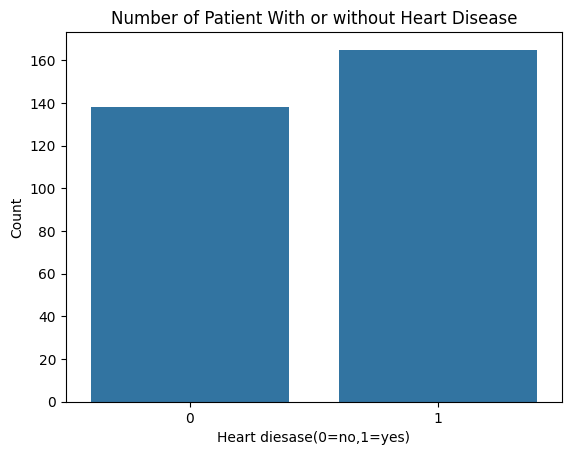

In [664]:
sns.countplot(x='target',data=df)
plt.title("Number of Patient With or without Heart Disease")
plt.xlabel('Heart diesase(0=no,1=yes)')
plt.ylabel("Count")
plt.show()

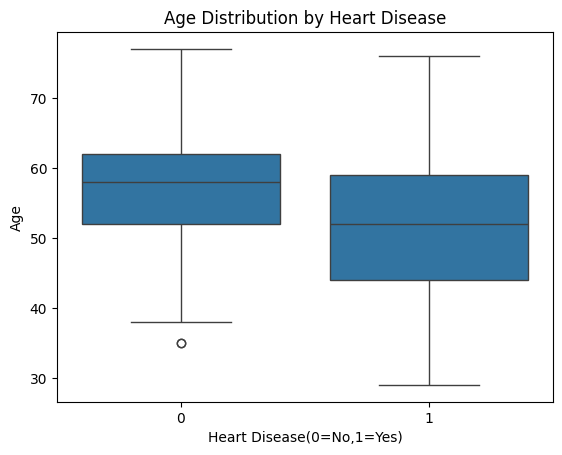

In [665]:
sns.boxplot(x='target',y='age',data=df)
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Heart Disease(0=No,1=Yes)")
plt.ylabel("Age")
plt.show()

In [666]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if(col!='target'):
    col_list.append(col)

X=df[col_list]
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['Vif_value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [667]:
print(vif_data)

    Features  Vif_value
0        age  38.998305
1        sex   3.523211
2         cp   2.414403
3   trestbps  58.557335
4       chol  26.267365
5        fbs   1.268205
6    restecg   2.058206
7    thalach  42.742178
8      exang   2.022527
9    oldpeak   3.062890
10     slope  10.072734
11        ca   1.808925
12      thal  17.165303


In [668]:
df.drop('age',inplace=True,axis=1)

In [669]:
col_list=[]
for col in df.columns:
  if(col!='target'):
    col_list.append(col)
X=df[col_list]
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['Vif_value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

    Features  Vif_value
0        sex   3.523210
1         cp   2.409683
2   trestbps  42.943607
3       chol  23.632837
4        fbs   1.267435
5    restecg   2.053256
6    thalach  42.561820
7      exang   2.022140
8    oldpeak   3.043370
9      slope  10.016331
10        ca   1.750197
11      thal  16.936385


In [670]:
df.drop('trestbps',inplace=True,axis=1)

In [671]:
col_list=[]
for col in df.columns:
  if(col!='target'):
    col_list.append(col)
X=df[col_list]
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['Vif_value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

   Features  Vif_value
0       sex   3.522114
1        cp   2.383258
2      chol  20.865491
3       fbs   1.237442
4   restecg   2.051422
5   thalach  32.377292
6     exang   1.973914
7   oldpeak   2.855438
8     slope   9.963361
9        ca   1.737514
10     thal  16.366895


In [672]:
df.drop('chol',inplace=True,axis=1)

In [673]:
col_list=[]
for col in df.columns:
  if(col!='target'):
    col_list.append(col)
X=df[col_list]
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['Vif_value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

  Features  Vif_value
0      sex   3.374772
1       cp   2.382887
2      fbs   1.235818
3  restecg   2.032590
4  thalach  23.147058
5    exang   1.917368
6  oldpeak   2.773035
7    slope   9.821067
8       ca   1.719335
9     thal  15.124601


In [674]:
df.drop('thalach',inplace=True,axis=1)

In [675]:
col_list=[]
for col in df.columns:
  if(col!='target'):
    col_list.append(col)
X=df[col_list]
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['Vif_value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

  Features  Vif_value
0      sex   3.348022
1       cp   2.154649
2      fbs   1.223893
3  restecg   2.005247
4    exang   1.915642
5  oldpeak   2.628953
6    slope   6.201591
7       ca   1.707658
8     thal  10.478889


In [676]:
df.drop('thal',inplace=True,axis=1)

In [677]:
col_list=[]
for col in df.columns:
  if(col!='target'):
    col_list.append(col)
X=df[col_list]
vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['Vif_value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

  Features  Vif_value
0      sex   3.038525
1       cp   2.112149
2      fbs   1.222870
3  restecg   1.957971
4    exang   1.795800
5  oldpeak   2.062440
6    slope   3.756703
7       ca   1.686170


In [678]:
df['target'].value_counts()

,count
target,
1,165
0,138


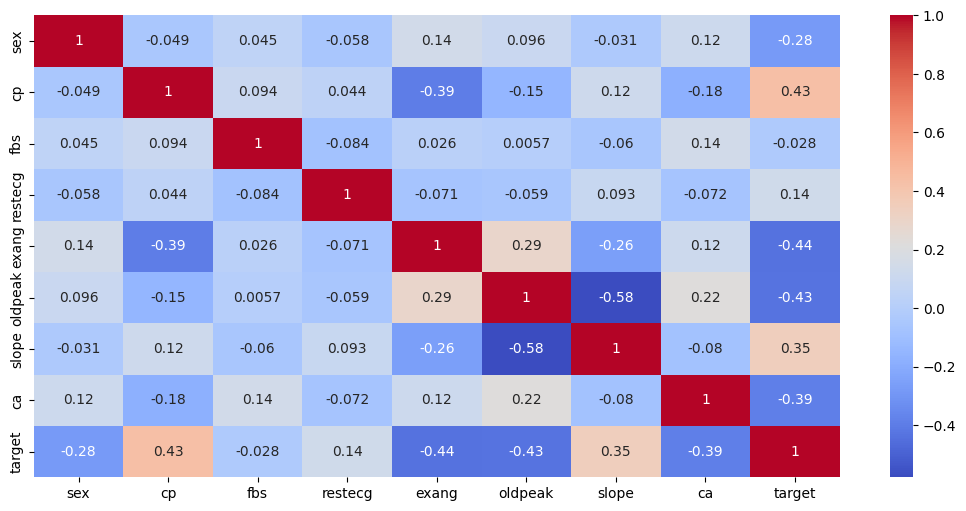

In [679]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [680]:
X=df.drop('target',axis=1)
Y=df['target']

In [681]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=1)

In [682]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [683]:
model_predict=LR.predict(x_test)
model_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0])

In [684]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_LR=confusion_matrix(y_test,model_predict)

In [685]:
accuracy_score(y_test,model_predict)

0.7912087912087912

In [686]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(x_train,y_train)


DecisionTreeClassifier()

In [687]:
model_predict_DC=DC.predict(x_test)
model_predict_DC

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

In [688]:
cm_DT=confusion_matrix(y_test,model_predict_DC)

In [689]:
accuracy_score(y_test,model_predict_DC)

0.7142857142857143

In [690]:
import graphviz
from sklearn import tree
from IPython.display import display
dot_data=tree.export_graphviz(
    DC,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(name) for name in df['target'].unique()],
    filled=True,
    rounded=True,
    special_characters=True
)

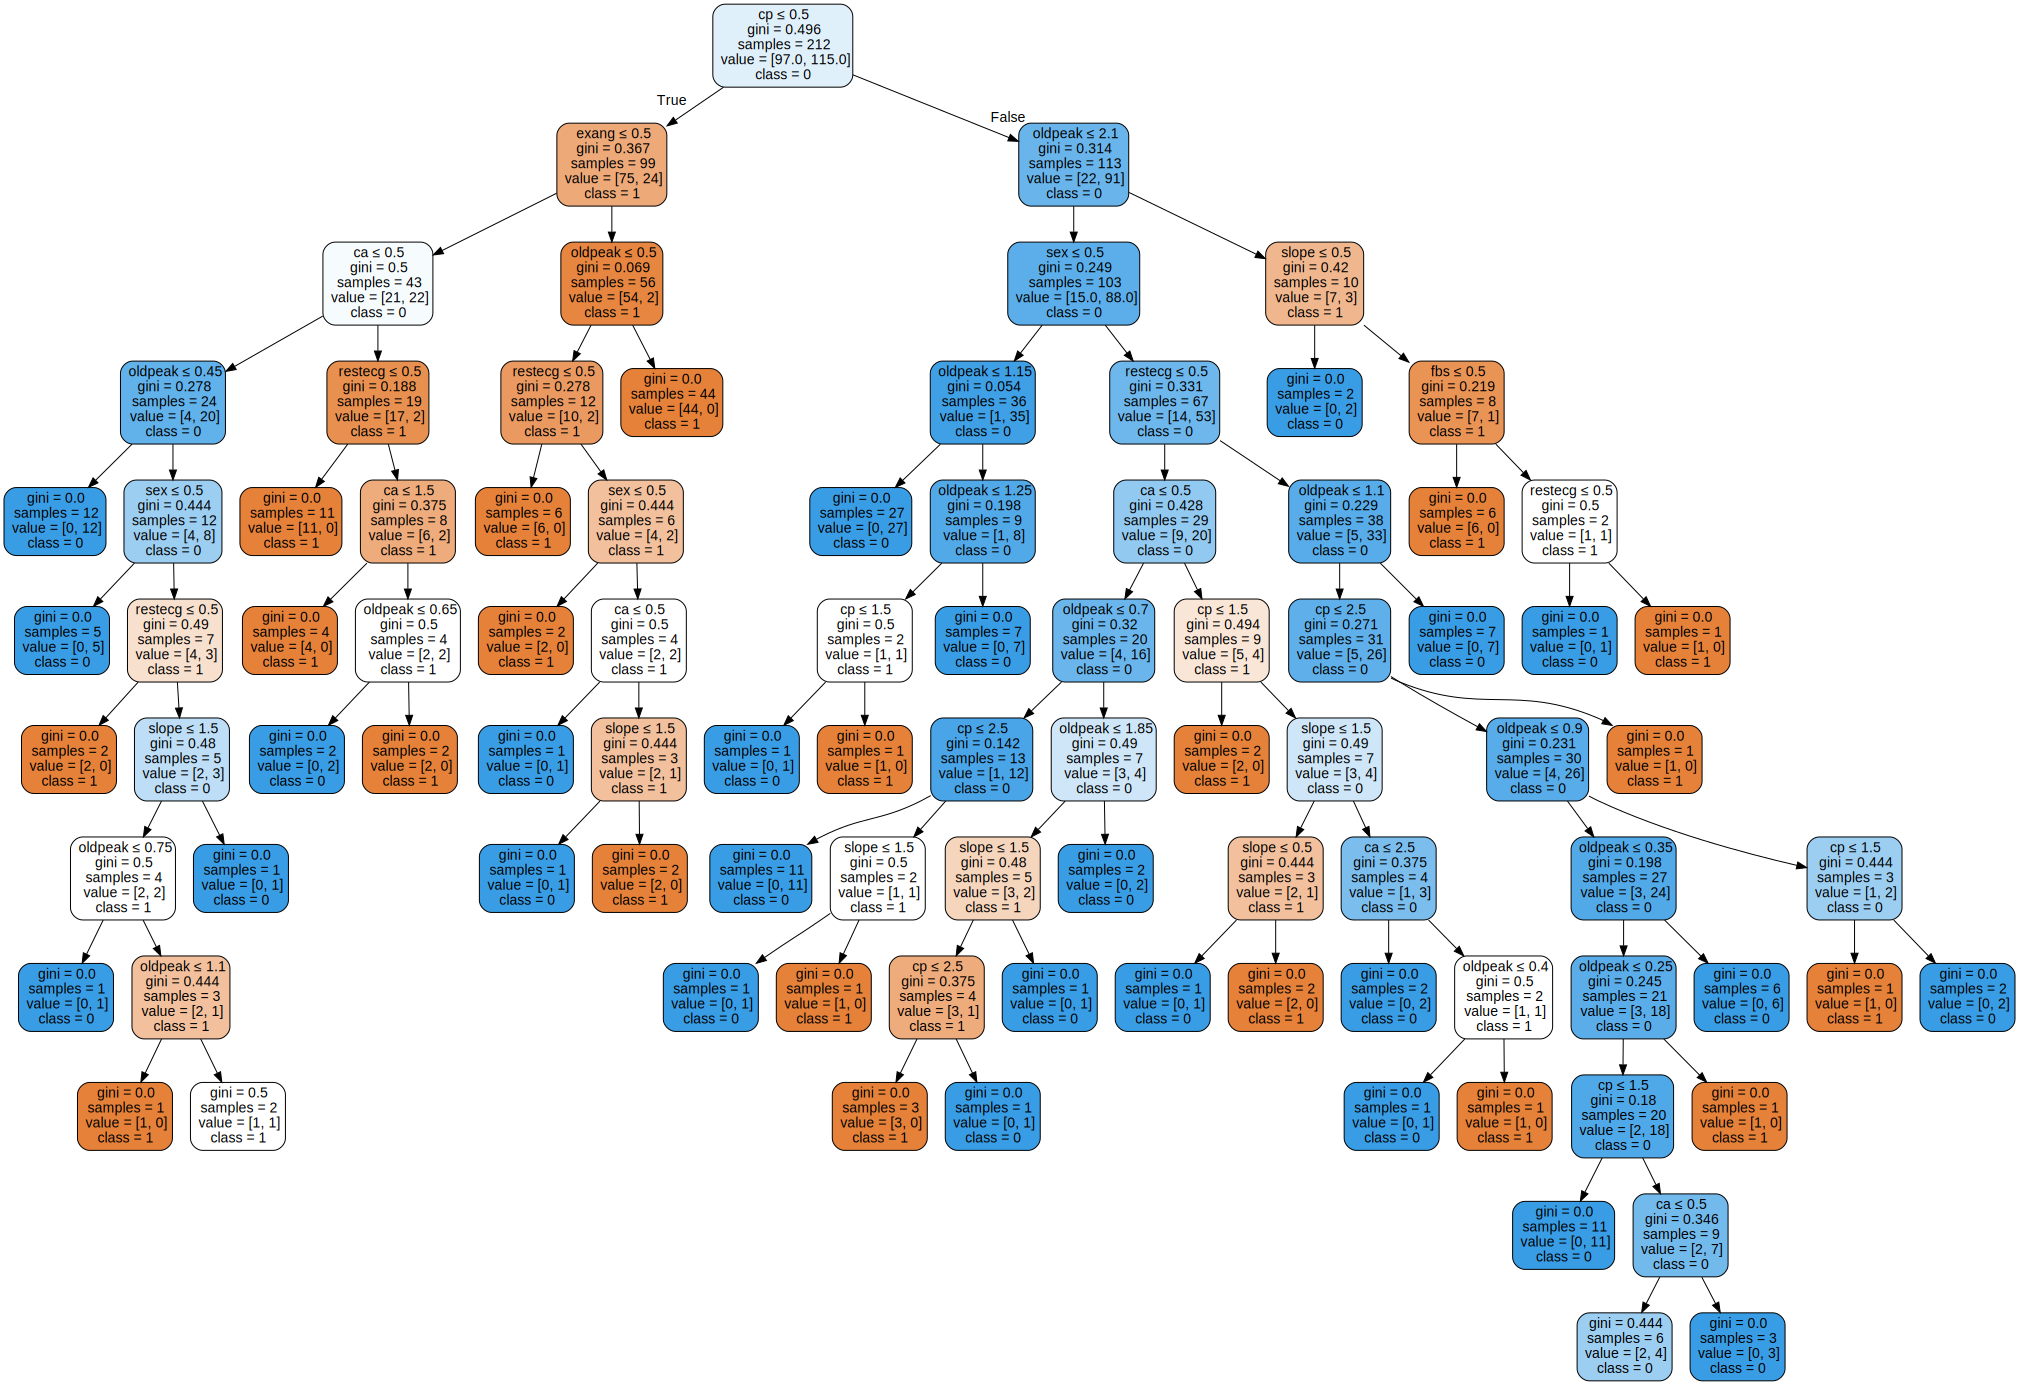

In [691]:
graph = graphviz.Source(dot_data)
graph.render("tree")
graph

In [692]:
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier()
RC.fit(x_train,y_train)
estimator = RC.estimators_[0]

In [693]:
model_predict_RC=RC.predict(x_test)

In [694]:
model_predict


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0])

In [695]:
confusionMatrixRC=confusion_matrix(y_test,model_predict_RC)

In [696]:
accuracy_score(y_test,model_predict_RC)

0.7582417582417582

In [697]:
dot_data=tree.export_graphviz(
    estimator,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(name) for name in df['target'].unique()],
    filled=True,
    rounded=True,
    special_characters=True
)

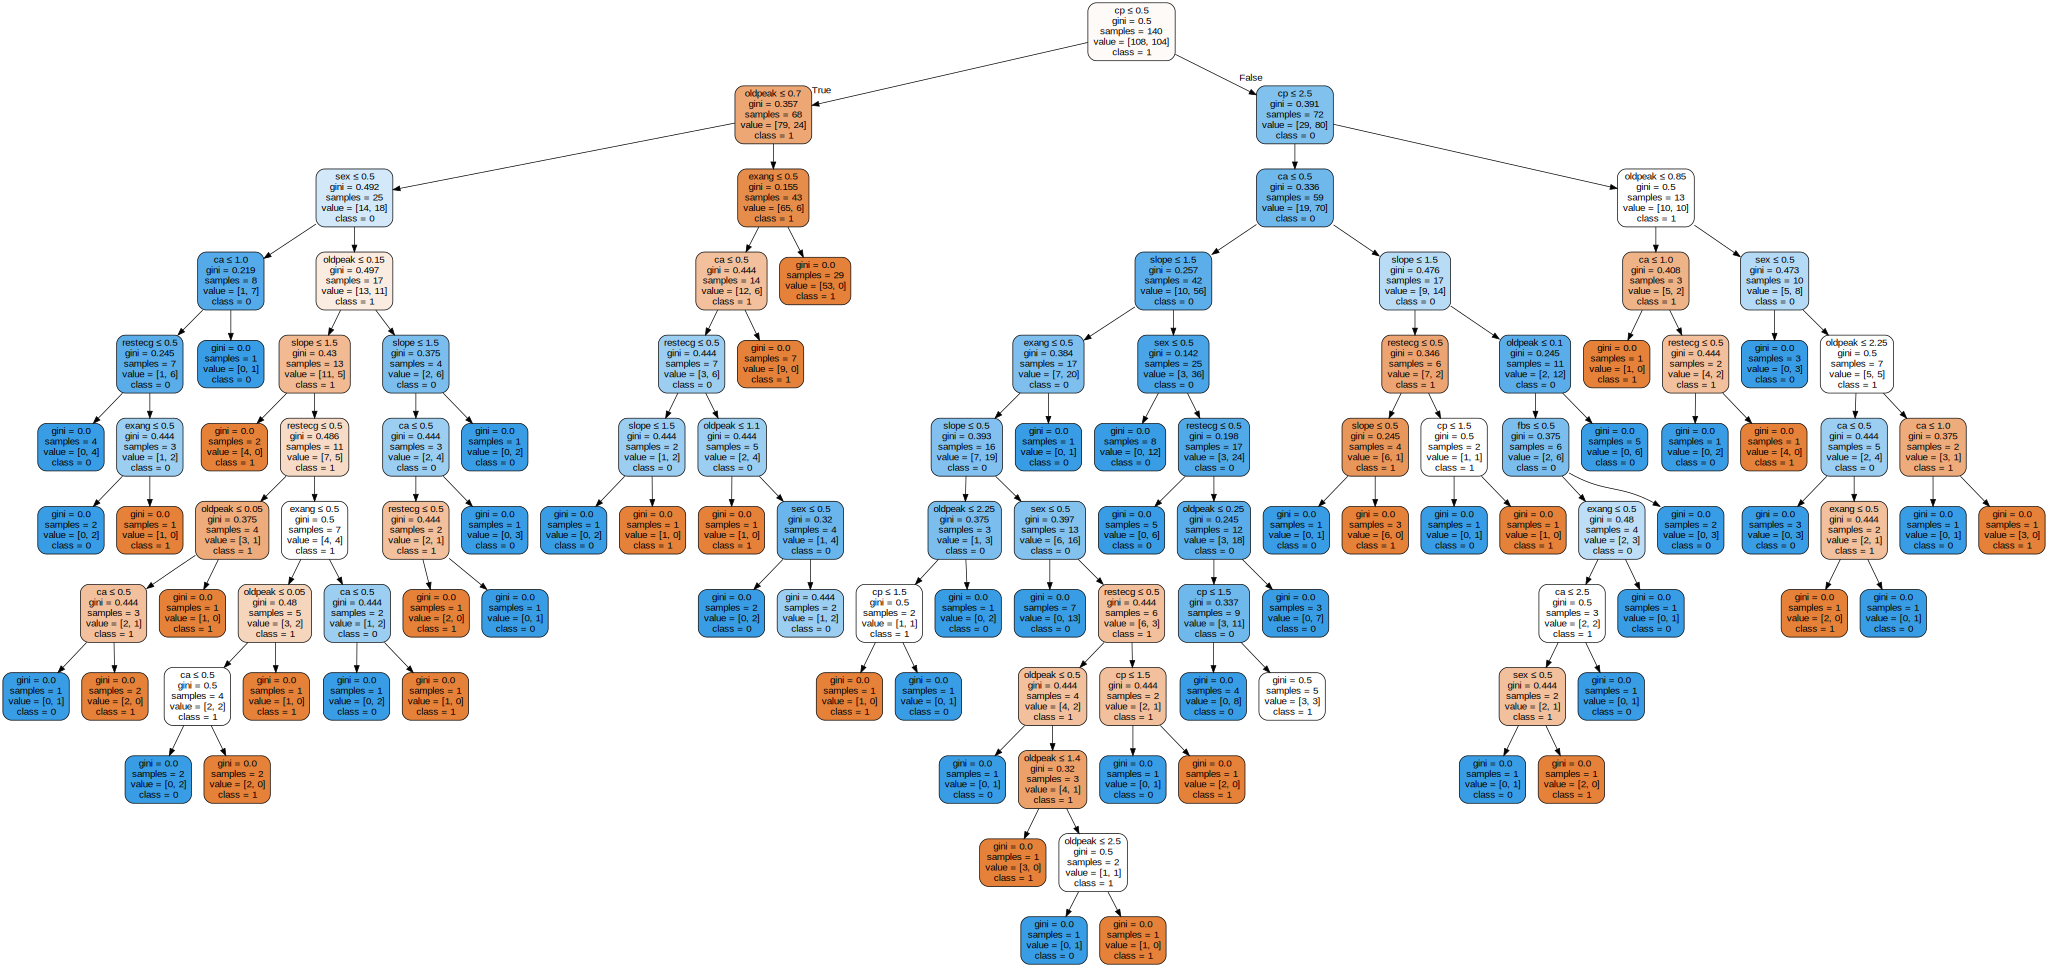

In [698]:
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")
graph

In [699]:
#Now selecting the best model
print("Logistic Regression Model Classification Report:-")
print(classification_report(y_test,model_predict))

Logistic Regression Model Classification Report:-
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [700]:
print("Logistic Decision Tree Classifier Model Report:-")
print(classification_report(y_test,model_predict_DC))

Logistic Decision Tree Classifier Model Report:-
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        41
           1       0.75      0.72      0.73        50

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



In [701]:
print("Logistic Decision Tree Classifier Model Report:-")
print(classification_report(y_test,model_predict_RC))

Logistic Decision Tree Classifier Model Report:-
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



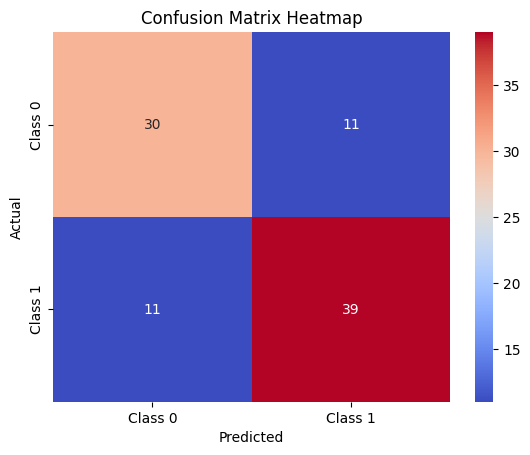

In [702]:
#Heat Map for Randomforest Classifier
sns.heatmap(confusionMatrixRC,annot=True,cmap='coolwarm',xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

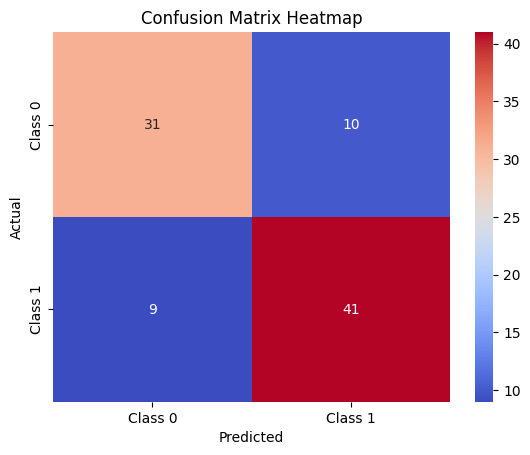

In [703]:
#Heat map Logistic Regressio Model
sns.heatmap(cm_LR,annot=True,cmap='coolwarm',xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

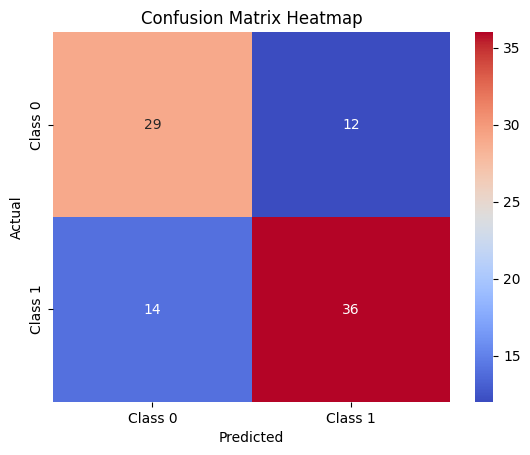

In [704]:
#Heat Map for Decison TreeClassifier
sns.heatmap(cm_DT,annot=True,cmap='coolwarm',xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
#According to the Accuracy Score and Confusion Matrix prediction Result.
#Random Forest Classifier model is the best model.